In [23]:
from matplotlib import pyplot as plt
import numpy as np
import os
import random

import joblib

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# import a lot of things from keras:
# sequential model
from keras.models import Sequential

# layers
from keras.layers import Input, Dense, LSTM

# loss function
from keras.metrics import categorical_crossentropy

# callback functions
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# convert data to categorial vector representation
from keras.utils import to_categorical

# nice progress bar for loading data
from tqdm.notebook import tqdm

# helper function for train/test split
from sklearn.model_selection import train_test_split

# import confusion matrix helper function
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# resample signal to n samples
from scipy.signal import resample

# XML parser
import xml.etree.ElementTree as ET

# encoding and normalizing data
from sklearn.preprocessing import LabelEncoder, StandardScaler

NUM_POINTS = 50

In [24]:
data = []

for root, subdirs, files in os.walk('dataset/xml_logs'):
    if 'ipynb_checkpoint' in root:
        continue
    
    if len(files) > 0:
        for f in tqdm(files):
            if '.xml' in f:
                fname = f.split('.')[0]
                label = fname[:-2]
                
                xml_root = ET.parse(f'{root}/{f}').getroot()
                
                points = []
                for element in xml_root.findall('Point'):
                    x = element.get('X')
                    y = element.get('Y')
                    points.append([x, y])
                    
                points = np.array(points, dtype=float)
                
                scaler = StandardScaler()
                points = scaler.fit_transform(points)
                
                resampled = resample(points, NUM_POINTS)
                
                data.append((label, resampled))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

In [25]:
print(data[0])

('delete_mark', array([[-0.59194871, -2.0564185 ],
       [-1.10749981, -1.72358499],
       [-0.73167789, -1.57949298],
       [-0.78982185, -1.33604894],
       [-0.63813219, -1.19769015],
       [-0.61820291, -0.97538177],
       [-0.44748775, -0.81930244],
       [-0.33869274, -0.63089084],
       [-0.18408279, -0.44177709],
       [-0.04503403, -0.26699279],
       [ 0.13402561, -0.11031941],
       [ 0.31877319,  0.0414887 ],
       [ 0.51111755,  0.15913344],
       [ 0.69051573,  0.26020367],
       [ 0.8638507 ,  0.36411051],
       [ 1.04083879,  0.43493292],
       [ 1.23708325,  0.61934448],
       [ 1.41892455,  0.73421804],
       [ 1.59796671,  0.81434867],
       [ 1.83782307,  0.90144771],
       [ 1.82299607,  0.96430651],
       [ 1.58686263,  0.99273416],
       [ 1.40841071,  0.99361867],
       [ 1.19702547,  1.0171165 ],
       [ 0.99961903,  1.02758324],
       [ 0.77968464,  1.03353725],
       [ 0.43026292,  1.07362357],
       [ 0.06962748,  1.12189154],
    

## Let's have a look at our data

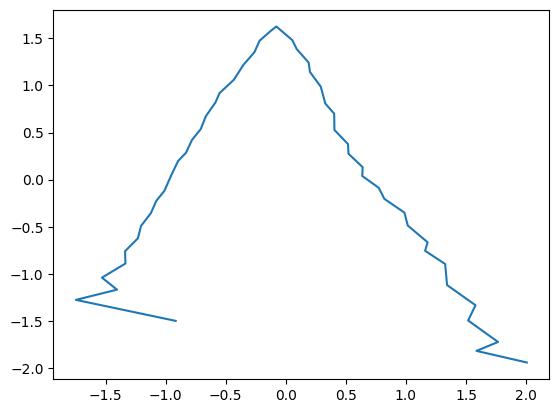

In [26]:
test_data = random.sample(data, 1)[0]

label = test_data[0]
sequence = test_data[1]
sequence

plt.plot(sequence.T[0], sequence.T[1]*-1)

In [27]:
# Prepare the data
labels = [sample[0] for sample in data]

print(set(labels))

encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)
encoder.fit(labels)

joblib.dump(encoder, 'label_encoder.pkl')

print(set(labels_encoded))

y = to_categorical(labels_encoded)

print(len(y[0]))

sequences = [sample[1] for sample in data]
X = np.array(sequences)

X_train = X
y_train = y

print(X_train, y_train)

{'x', 'right_curly_brace', 'left_curly_brace', 'arrow', 'right_sq_bracket', 'question_mark', 'check', 'rectangle', 'caret', 'delete_mark', 'triangle', 'circle', 'left_sq_bracket', 'pigtail', 'v', 'star'}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
16
[[[-0.59194871 -2.0564185 ]
  [-1.10749981 -1.72358499]
  [-0.73167789 -1.57949298]
  ...
  [ 0.61466385 -1.51681592]
  [ 0.63792353 -1.77963752]
  [ 0.93556137 -2.27048558]]

 [[-0.98503919  1.5721284 ]
  [-1.97345653  1.36001887]
  [-1.5082533   1.27826681]
  ...
  [ 1.69557639  1.58328863]
  [ 1.48899593  1.66594326]
  [ 2.05364482  1.89723494]]

 [[ 2.2433932  -0.81151507]
  [ 1.71596502 -1.68363406]
  [ 1.5871993  -1.41320205]
  ...
  [ 1.64932915  1.48694551]
  [ 2.19602021  1.26863274]
  [ 2.88334897  1.52300279]]

 ...

 [[-1.15697764  1.54022759]
  [-1.04185226  1.37334678]
  [-0.95232844  1.28552694]
  ...
  [-0.02594869  0.46668328]
  [-0.69317321  1.13876627]
  [-1.09316959  1.58725567]]

 [[-2.36791746 -1.39822826]


In [28]:
# Define the model
model = Sequential()

# add LSTM layer
# input shape is (length of an individual sample, dimensions of the sample)
# in our case: two dimensions, as we have X and Y coordinates

# old syntax
#model.add(LSTM(64, input_shape=(NUM_POINTS, 2)))

# new syntax
model.add(Input((NUM_POINTS, 2)))
model.add(LSTM(128))

# add dense layer to do machine learning magic
model.add(Dense(32, activation='relu'))

# here, you can add more layers and maybe a dropout for better performance

# softmax layer for classification
model.add(Dense(len(set(labels)), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)
stop_early = EarlyStopping(monitor='val_loss', patience=3)

In [29]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    #validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[reduce_lr, stop_early]
)

Epoch 1/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5157 - loss: 1.6356 - learning_rate: 0.0010
Epoch 2/10
 13/165 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9597 - loss: 0.1505

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate
  current = self.get_monitor_value(logs)


165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9496 - loss: 0.1812 - learning_rate: 0.0010
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9691 - loss: 0.1131 - learning_rate: 0.0010
Epoch 4/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9785 - loss: 0.0798 - learning_rate: 0.0010
Epoch 5/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9862 - loss: 0.0479 - learning_rate: 0.0010
Epoch 6/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9889 - loss: 0.0446 - learning_rate: 0.0010
Epoch 7/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9873 - loss: 0.0490 - learning_rate: 0.0010
Epoch 8/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9890 - loss: 0.0433 - learning_rate: 0.0010
Epoch 9/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9928 - loss: 0.0294 - learning_rate: 0.0010
Epoch 10/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9877 - loss: 0.0496 - learning_rate: 0.0010


In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 128)            │        67,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215,186 (840.57 KB)

 Trainable params: 71,728 (280.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 143,458 (560.39 KB)

In [31]:
model.save('model_three.h5')